# Customer Analytics in FMGC Industry (Part 2)
#### by Sooyeon Won

### Keywords 

- Marketing Mix 
- STP framework
- Purchase Analytics 
- Descriptive Analysis by Segments
- Data Visualisations 

### Contents 

<ul>
<li><a href="#Introduction">1. Introduction</a></li> 
<li><a href="#Preparation">2. Data Preparation</a></li>
<li><a href="#Exploration">3. Data Exploration</a></li>
<li><a href="#Analysis">4. Data Analysis</a></li>
&emsp;4.1. Customer Analytics<br>
&emsp;4.2. Purchase Analytics <br>
&emsp;&emsp;&emsp;i. Descriptive Analyses by Segment <br>
&emsp;&emsp;&emsp;&emsp;&emsp; i-1. The Proportion of each Segment <br>
&emsp;&emsp;&emsp;&emsp;&emsp; i-2. Purchase Occasions and Purchase Incidences <br>
&emsp;&emsp;&emsp;&emsp;&emsp; i-3. Brand Chocie <br>
&emsp;&emsp;&emsp;&emsp;&emsp; i-4. Revenue Comparison between segments <br>
&emsp;&emsp;&emsp;ii. Predictive Analyses <br>
&emsp;&emsp;&emsp;&emsp;&emsp; ii-1. Modeling Purchase Incidence<br>
&emsp;&emsp;&emsp;&emsp;&emsp; ii-2. Modeling Brand Choice <br>
&emsp;&emsp;&emsp;&emsp;&emsp; ii-3. Modeling Purchase Quantity <br>
<li><a href="#Conclusion">5. Conclusion</a></li>
</ul>


## 4. Data Analysis
### 4.2. Purchase Analytics
- Data Preparation from Part 1
- i. Descriptive Analysis by Segments <br>
&emsp;&emsp;&emsp; i-1. The Proportion of each Segment <br>
&emsp;&emsp;&emsp; i-2. Purchase Occasions and Purchase Incidences: How often each segment group go shopping? <br>
&emsp;&emsp;&emsp; i-3. Brand Chocie: Which brand of products the customers purchase? <br>
&emsp;&emsp;&emsp; i-4. Revenue Comparison between segments: How much money they spend? <br>

### Data Preparation from Part 1

In [1]:
# Import the relevant libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 

import pickle

In [2]:
# Load the dataset
purchase_df = pd.read_csv('purchase data.csv', index_col = 0)

In [3]:
purchase_df.head() # Glance at the first dataset(1)

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
purchase_df.info() # Glance at the first dataset(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58693 entries, 200000001 to 200000500
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                58693 non-null  int64  
 1   Incidence          58693 non-null  int64  
 2   Brand              58693 non-null  int64  
 3   Quantity           58693 non-null  int64  
 4   Last_Inc_Brand     58693 non-null  int64  
 5   Last_Inc_Quantity  58693 non-null  int64  
 6   Price_1            58693 non-null  float64
 7   Price_2            58693 non-null  float64
 8   Price_3            58693 non-null  float64
 9   Price_4            58693 non-null  float64
 10  Price_5            58693 non-null  float64
 11  Promotion_1        58693 non-null  int64  
 12  Promotion_2        58693 non-null  int64  
 13  Promotion_3        58693 non-null  int64  
 14  Promotion_4        58693 non-null  int64  
 15  Promotion_5        58693 non-null  int64  
 16  Sex       

In [5]:
purchase_df.isnull().sum() # Check missing values 

Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [6]:
sum(purchase_df.duplicated()) # Check duplicated values

0

> There are 58,693 purchase records with 23 features in this dataset. The dataset does not contain missing nor duplicated values. The explanation of each feature is as follows: 
>- ID (numerical): a unique identifier of a customer.	
>- Day	(numerical) when the customer has visited the store.  				
>- Incidence	(categorical) Purchase Incidence. Did the customer purchase a product?
		0	The customer has not purchased an item from the category of interest 	
		1	The customer has purchased an item from the category of interest 	
>- Brand	(categorical) Shows which brand the customer has purchased.	
                0	No brand was purchased	
		1,2,3,4,5	Chocolate Product Brand ID					
>- Quantity	(numerical)	Number of items bought by the customer from the product category of interest	
>- Last_Inc_Brand	(categorical)	Shows which brand the customer has purchased on their previous store visit	
                0	No brand was purchased	
		1,2,3,4,5	Chocolate Product Brand ID	
>- Last_Inc_Quantity (numerical)	Number of items bought by the customer from the product category of interest during their previous store visit.					
>- Price_1,2,3,4,5	(numerical)	Price of an item from Brand 1,2,3,4,5 on a particular day	
>- Promotion_1,2,3,4,5 (categorical) Indicator whether Brand 1,2,3,4,5 was on promotion or not on a particular day	
> Rest features (Sex, Marital status, Age, Education, Income, Occupation, Settlement size) are consistent with the features in demographic dataset. 



#### Import Segmentation Model

In [7]:
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

#### Standardisation of  Demographic Features 

In [8]:
features = purchase_df[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
purchase_segm_std = scaler.transform(features)

#### PCA Transformation 

In [9]:
purchase_segm_pca = pca.transform(purchase_segm_std)

#### K-means Clustering with PCA

In [10]:
# Predict clusters based on K-means Clustering with PCA
purchase_segm_kmeans_pca= kmeans_pca.predict(purchase_segm_pca)

In [11]:
# Checkpoint 
purchase_predictors = purchase_df.copy()

In [12]:
purchase_predictors['Segment'] = purchase_segm_kmeans_pca
purchase_predictors= purchase_predictors.reset_index()
purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


### i. Descriptive Analysis by Segments

In this section, I focus on descriptive analysis of the purchase data by individuals and then by segments to gain insight into customer shopping habits. 
- i-1. The Proportion of each Segment
- i-2. Purchase Occasions and Purchase Incidences: How often each segment group go shopping?
- i-3. Brand Choice: Which brand of products the customers purchase?
- i-4. Revenue Comparison between segments: How much money they spend?

### i-1. Segment Proportion 

Based on the customer data from the company's loyalty program, I firstly compare the size of each segment. To do so, I aggregated the data by Customers then grouped by each segment.


#### Aggregate the Data by Customers  

In [13]:
traffic_freq = purchase_predictors[['ID','Incidence']].groupby(['ID']).count()
purchase_freq = purchase_predictors[['ID','Incidence']].groupby(['ID']).sum()
segm_info = purchase_predictors[['ID', 'Segment']].groupby(['ID']).mean()

traffic_freq = traffic_freq.rename(columns = {'Incidence': 'N_Visits'})
purchase_freq = purchase_freq.rename(columns = {'Incidence': 'N_Purchases'})

# Average number of purchases by customer ID
df_customer = traffic_freq.join(purchase_freq)
df_customer['Avg_N_Purchases'] = df_customer.N_Purchases/ df_customer.N_Visits

purchase_descr = df_customer.join(segm_info)
purchase_descr.head()

,N_Visits,N_Purchases,Avg_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


#### Group-by each segment

In [14]:
# Calculate the proportions of each segment and set the appropriate column name. 
segm_prop = purchase_descr[['N_Visits', 'Segment']].groupby(['Segment']).count() / purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Visits': 'Segment Proportions'}).reset_index()
segm_prop.Segment.replace({0: 'Fewer-Opportunities', 1: 'Career-Focused',   2: "Standard", 3:"Well-Off"}, inplace=True)
segm_prop.head()

,Segment,Segment Proportions
0,Fewer-Opportunities,0.378
1,Career-Focused,0.222
2,Standard,0.206
3,Well-Off,0.194


Text(0.5, 1.0, 'Average Proportion of Purchases by Segment')

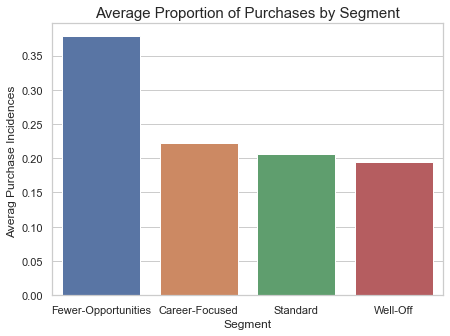

In [15]:
plt.figure(figsize=[7,5])
sns.barplot(data = segm_prop, x = 'Segment', y = 'Segment Proportions')
plt.xlabel('Segment', fontsize = 12)
plt.ylabel('Averag Purchase Incidences ', fontsize = 12)
plt.title('Average Proportion of Purchases by Segment', fontsize = 15)

>The largest segment is "Fewer-Opportunities". Almost 40 percent of customers belong to this segment. The second largest segment is   "career-focused". 22.2 % of customers are in this segment. The proportion of the other groups "Standard" and "Well-Off" are similar to ca. 20%.

### i-2. Purchase Occasions and Purchase Incidences

In [16]:
# Calculate the mean by the four segments to determine the average customer behaivour in each segment.
segments_mean = purchase_descr.groupby(['Segment']).mean().reset_index()
segments_mean.Segment.replace({0: 'Fewer-Opportunities', 1: 'Career-Focused',   2: "Standard", 3:"Well-Off"}, inplace=True)
segments_mean

,Segment,N_Visits,N_Purchases,Avg_N_Purchases
0,Fewer-Opportunities,113.894180,22.793651,0.201679
1,Career-Focused,123.216216,39.603604,0.281944
2,Standard,117.699029,24.902913,0.212773
3,Well-Off,117.185567,34.731959,0.285639


In [17]:
# Calculate the standard deviation by segments. It determines how homogoneus each of the segments is.
segments_std = purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Proportion of Purchases by Segment')

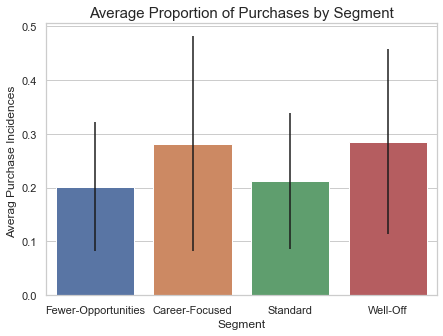

In [18]:
# Plot the average proportion of purchases.
avg_N_Purchase_in_percentage = segments_mean.Avg_N_Purchases*100
plt.figure(figsize=[7,5])
sns.barplot(data = segments_mean, x = 'Segment', y = 'Avg_N_Purchases',
              yerr = segments_std['Avg_N_Purchases'])
plt.xlabel('Segment', fontsize = 12)
plt.ylabel('Averag Purchase Incidences ', fontsize = 12)
plt.title('Average Proportion of Purchases by Segment', fontsize = 15)

### i-3. Brand Choice 

Now we come to the question: Which brand is the customer going to choose?  I focused on the observations only where customers have bought at least one chocolate candy bar.

In [19]:
# Select only rows where incidence is 1. This means that I filtered the times a purchase was made.
purchase_incidence = purchase_predictors.query('Incidence ==1')
purchase_incidence.shape

(14638, 25)

In [20]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = purchase_incidence['Segment'], purchase_incidence['ID']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001


In [21]:
brand_ID = brand_dummies.groupby(['ID'], as_index = True).mean() # group by each customer

In [22]:
mean_brand_segment = brand_ID.groupby(['Segment'], as_index = True).mean() # group by each segment

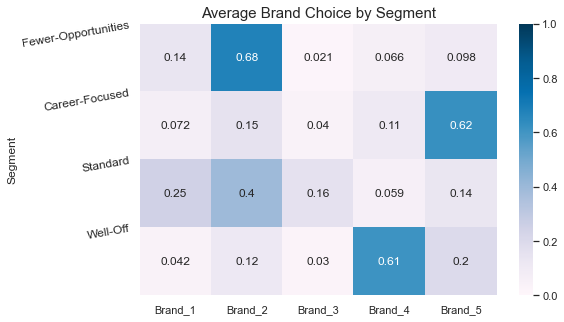

In [23]:
plt.figure(figsize=[8,5])
sns.heatmap(mean_brand_segment, vmin = 0, vmax = 1, cmap = 'PuBu', annot = True)
plt.yticks([0, 1, 2, 3], ['Fewer-Opportunities', 'Career-Focused', 'Standard', 'Well-Off'], rotation = 10, fontsize = 12)
plt.title('Average Brand Choice by Segment', fontsize = 15)
plt.show()

> Note that each chocolate brands are listed in ascending order of price. This means that brand 1 is the cheapest brand, while brand 5 is the most expensive one. 
>- **Fewer-Opportunities** segment shows an extremely strong preference for brand_2. Almost 70 percent of the segment chooses this brand of chocolate. Brand_2 Chocolate certainly is not the cheapest one. Thus, we can guess that the price of chocolate bars is not really matters to our customers to purchase. 
>- **Career-Focused** segment: ca. 63 percent of the career focus segment buys brand_5 which is the most expensive brand. It seems that this cluster of young ambitious career focused individuals enjoys this fancy candy bar with no additional information. It can be speculated that the career focus segment is looking for luxury status and this alone may be an opportunity to raise the price of brand 5 even further.
>- The **Well-Off** segment enjoys one of the most luxurious brands but not the most expensive one. Brand_4 is the most popularly bought brand followed by brand_5. 
>- **Standard** segment is the most heterogeneous segment. It seems that people from the standard segment prefer brand_2 and a weaker preference for brands 1 and 3. It's obvious that this segment don't like buying brand 4. Nevertheless, their preference is scattered all around. One idea could be to try to influence them to try to different brands.   


### i-4. Dissecting the Revenue by Segment

In this section, I explore the revenue by segment. The revenue is calculated by multiplying product price with purchased quantity. 

In [24]:
# Filter the datapoints by each brand.
brand_1 = purchase_predictors.query('Brand ==1')
brand_2 = purchase_predictors.query('Brand ==2')
brand_3 = purchase_predictors.query('Brand ==3')
brand_4 = purchase_predictors.query('Brand ==4')
brand_5 = purchase_predictors.query('Brand ==5')

# Compute the revenue of each brand
brand_1.loc[:, 'Revenue_Brand_1'] = brand_1['Price_1'] * brand_1['Quantity']
brand_2.loc[:, 'Revenue_Brand_2'] = brand_2['Price_2'] * brand_2['Quantity']
brand_3.loc[:, 'Revenue_Brand_3'] = brand_3['Price_3'] * brand_3['Quantity']
brand_4.loc[:, 'Revenue_Brand_4'] = brand_4['Price_4'] * brand_4['Quantity']
brand_5.loc[:, 'Revenue_Brand_5'] = brand_5['Price_5'] * brand_5['Quantity']

# Aggregate the revenues 
brand_1_segm = brand_1.groupby('Segment')['Revenue_Brand_1'].sum()
brand_2_segm = brand_2.groupby('Segment')['Revenue_Brand_2'].sum()
brand_3_segm = brand_3.groupby('Segment')['Revenue_Brand_3'].sum()
brand_4_segm = brand_4.groupby('Segment')['Revenue_Brand_4'].sum()
brand_5_segm = brand_5.groupby('Segment')['Revenue_Brand_5'].sum()

segments_brand_revenue = pd.DataFrame({'Segment' :  ['Fewer-Opportunities', 'Career-Focused', 'Standard', 'Well-Off'] ,
                                      'Revenue_Brand_1': brand_1_segm.values, 
                                      'Revenue_Brand_2': brand_2_segm.values, 
                                      'Revenue_Brand_3': brand_3_segm.values, 
                                      'Revenue_Brand_4': brand_4_segm.values, 
                                      'Revenue_Brand_5': brand_5_segm.values})

segments_brand_revenue.loc[:, 'Total_Rev'] = segments_brand_revenue.sum(axis =1)
segments_brand_revenue.loc[:,'Segment Proportions'] = segm_prop['Segment Proportions']

C:\Users\wonso\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wonso\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [25]:
segments_brand_revenue

,Segment,Revenue_Brand_1,Revenue_Brand_2,Revenue_Brand_3,Revenue_Brand_4,Revenue_Brand_5,Total_Rev,Segment Proportions
0,Fewer-Opportunities,2258.90,13909.78,722.06,1805.59,2214.82,20911.15,0.378
1,Career-Focused,736.09,1791.78,664.75,2363.84,19456.74,25013.20,0.222
2,Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
3,Well-Off,699.47,1298.23,725.54,14009.29,5509.69,22242.22,0.194


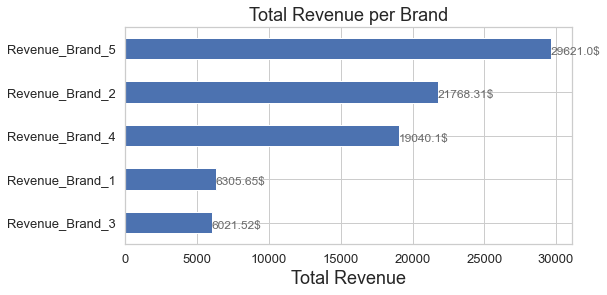

In [26]:
brand_rev = segments_brand_revenue.iloc[:,1:6].sum(axis=0)
ax = brand_rev.sort_values(ascending=False).plot(kind='barh', figsize=(8,4), color="b", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Total Revenue per Brand", fontsize=18)
ax.set_xlabel("Total Revenue", fontsize=18);

# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2))+'$', fontsize=12, color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()

>- Brand 3 has the lowest revenue compared to the other products. It is the middle brand in terms of price, and its highest contributor is the "Standard" segment. Standard segment would like the first three brands, so they can be influenced to buy more of the 3rd brand. Maybe if brand 3 reduces its price it is likely that the standard segment would pivot towards it. <br><br>
>- The customers of Brand 4 seem mainly from the "Well-Off" segment. The customers in this segment who did not choose this brand bought an even more expensive alternative: Brand 5. Therefore, they seem to be loyal and not really affected by price. Therefore brand 4 could try cautiously increasing its price. The hypothesis here is they would likely retain most of its customers and increase the revenue per sale.

Text(0.5, 1.0, 'Total Revenue of Chocolate Products by Segment')

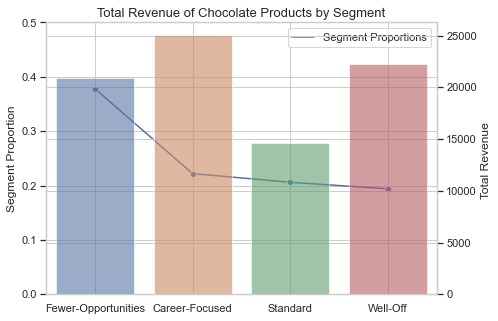

In [27]:
ax1 = sns.set_style()
fig, ax1 = plt.subplots(figsize=[7,5])
sns.lineplot(data = segm_prop, marker='o', sort = False, ax=ax1, color = 'black')
ax1.set_ylabel('Segment Proportion', fontsize = 12)
ax1.set_ylim([0,0.5])
ax2 = ax1.twinx()
sns.barplot(data = segments_brand_revenue, x = 'Segment', y = 'Total_Rev',  alpha=0.6)
ax2.set_ylabel('Total Revenue ', fontsize = 12)

plt.xlabel('Segment', fontsize = 12)

plt.title('Total Revenue of Chocolate Products by Segment', fontsize = 13)

In the last plot, I compare the size of each segment with the revenue from each segment. The size of each segment is presented using a line. 
- "Career-Focused" brings the most revenue followed by "Well-Off" and "Fewer-Opportunities", while the "Standard" segment brings the least.  Considering that "Career-Focused" is not the largest segment, it is a surprising finding.  In Part 1 of the analysis, we found out that "Career-focused" segment was buying the most expensive brand. Indeed, it seems that they are by far the most prominent segment for the store regarding chocolates. 
- "Standard" segment is almost as big as "Career-focused". However, it brings far less revenue to the company. In fact, "Standard" segment contributes the least of all segments in comparison. 
- "Well-Off" and "Fewer-Opportunities" segments spend similar amount of money on chocolates. However, note that "Fewer-Opportunities" is twice the size of "Well-Off" segment. <br>

So far, we examined different measures together. In the next part of analysis, I focused on the point of view and explore the revenue table from a brand's perspective.
